In [1]:
import pandas as pd
import os
import os.path as osp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = os.listdir("./data")
files = [i for i in files if i[-3:] == "csv"]
files

['weather.csv', 'trip.csv', 'sample_submit.csv', 'status.csv', 'station.csv']

In [3]:
weather_df = pd.read_csv(osp.join("data", files[0]))
weather_df["date"] = pd.to_datetime(weather_df.date)
weather_df

,date,max_temperature,mean_temperature,min_temperature,max_dew_point,mean_dew_point,min_dew_point,max_humidity,mean_humidity,min_humidity,...,min_sea_level_pressure,max_visibility,mean_visibility,min_visibility,max_wind_Speed,mean_wind_speed,precipitation,cloud_cover,events,wind_dir_degrees
0,2013-09-01,81,70,61,62,58,54,80,67,47,...,29.85,10,10,10,14,4,0.00,1,NaN,354
1,2013-09-02,80,71,66,64,61,58,80,70,58,...,29.86,10,10,10,14,4,0.00,5,NaN,337
2,2013-09-03,81,69,58,60,56,52,82,65,44,...,29.93,10,10,10,19,2,1.71,6,Rain,341
3,2013-09-04,82,68,56,61,55,49,81,64,43,...,29.94,10,10,10,15,0,0.00,0,NaN,324
4,2013-09-05,81,68,56,59,54,50,81,63,41,...,29.95,10,10,10,16,1,0.00,0,NaN,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2015-08-27,89,76,63,59,55,48,78,52,26,...,29.97,10,10,10,22,5,0.00,0,NaN,356
726,2015-08-28,91,78,64,65,60,53,87,61,34,...,29.84,10,10,10,22,7,0.00,1,NaN,356
727,2015-08-29,81,73,64,65,62,52,87,68,49,...,29.92,10,10,10,23,7,0.00,4,NaN,349
728,2015-08-30,79,70,61,60,55,51,78,63,47,...,29.96,10,10,10,22,8,0.00,2,NaN,327


In [4]:
trip_df = pd.read_csv(osp.join("data", files[1]))
trip_df.head()

,trip_id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type
0,0,63,8/29/2013 14:13,54,8/29/2013 14:14,54,0,Subscriber
1,1,70,8/29/2013 14:42,8,8/29/2013 14:43,8,1,Subscriber
2,2,71,8/29/2013 10:16,20,8/29/2013 10:17,20,2,Subscriber
3,3,77,8/29/2013 11:29,8,8/29/2013 11:30,8,3,Subscriber
4,4,83,8/29/2013 12:02,54,8/29/2013 12:04,55,4,Subscriber


In [5]:
trip_df.subscription_type.value_counts()

Subscriber    566746
Customer      103213
Name: subscription_type, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

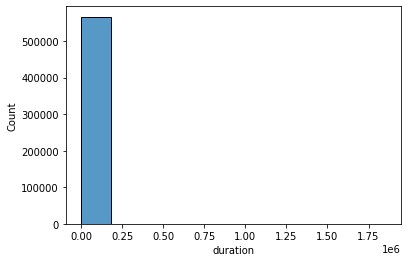

In [6]:
#sorted(trip_df["duration"].values)[-20:]
#trip_df[trip_df["duration"] == 17270400]
tmp_trip_df = trip_df.copy()
#tmp_trip_df.loc[tmp_trip_df["duration"] > 1000,"duration"] = 1000
tmp_trip_df = tmp_trip_df[tmp_trip_df["subscription_type"] == "Subscriber"]
#sns.histplot(data = np.log1p(tmp_trip_df['duration']), bins=10)
sns.histplot(data = tmp_trip_df['duration'], bins=10)

In [7]:
status_df = pd.read_csv(osp.join("data", files[3]))
status_df.head()

,id,year,month,day,hour,station_id,bikes_available,predict
0,0,2013,9,1,0,0,11.0,0
1,1,2013,9,1,1,0,11.0,0
2,2,2013,9,1,2,0,11.0,0
3,3,2013,9,1,3,0,11.0,0
4,4,2013,9,1,4,0,11.0,0


In [8]:
station_df = pd.read_csv(osp.join("data", files[4]))
station_df.head()

,station_id,lat,long,dock_count,city,installation_date
0,0,37.32973,-121.90178,27,city1,8/6/2013
1,1,37.33070,-121.88898,15,city1,8/5/2013
2,2,37.33399,-121.89490,11,city1,8/6/2013
3,3,37.33141,-121.89320,19,city1,8/5/2013
4,4,37.33672,-121.89407,15,city1,8/7/2013


In [9]:
tmp = status_df['year'].astype(str).str.cat(status_df['month'].astype(str), sep='/')
tmp = tmp.str.cat(status_df['day'].astype(str), sep='/')
tmp = tmp.str.cat(status_df['hour'].astype(str), sep='/')
status_df["time"] = pd.to_datetime(tmp,format='%Y/%m/%d/%H')
status_df

,id,year,month,day,hour,station_id,bikes_available,predict,time
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00
...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31 19:00:00
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31 20:00:00
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31 21:00:00
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31 22:00:00


<AxesSubplot:xlabel='time', ylabel='bikes_available'>

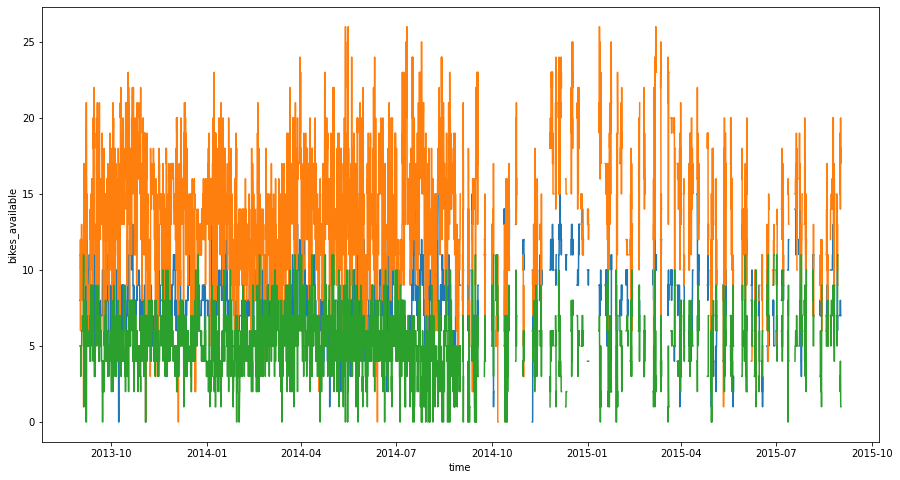

In [10]:
plt.figure(figsize = (15,8))
tmp_df = status_df[status_df.station_id == 1]
sns.lineplot(y = tmp_df['bikes_available'], x  = tmp_df['time'])
tmp_df = status_df[status_df.station_id == 0]
sns.lineplot(y = tmp_df['bikes_available'], x  = tmp_df['time'])
tmp_df = status_df[status_df.station_id == 2]
sns.lineplot(y = tmp_df['bikes_available'], x  = tmp_df['time'])

In [11]:
tmp = status_df['year'].astype(str).str.cat(status_df['month'].astype(str), sep='/')
tmp = tmp.str.cat(status_df['day'].astype(str), sep='/')
#tmp = tmp.str.cat(status_df['hour'].astype(str), sep='/')
#status_df["date"] = pd.to_datetime(tmp,format='%Y/%m/%d/%H')
status_df["date"] = pd.to_datetime(tmp,format='%Y/%m/%d')

In [12]:
status_df[(status_df.year == 2013)&(status_df.day == 29)&(status_df.station_id == 69)&(status_df.month == 9)]

,id,year,month,day,hour,station_id,bikes_available,predict,time,date
1209552,1209552,2013,9,29,0,69,NaN,0,2013-09-29 00:00:00,2013-09-29
1209553,1209553,2013,9,29,1,69,NaN,0,2013-09-29 01:00:00,2013-09-29
1209554,1209554,2013,9,29,2,69,NaN,0,2013-09-29 02:00:00,2013-09-29
1209555,1209555,2013,9,29,3,69,NaN,0,2013-09-29 03:00:00,2013-09-29
1209556,1209556,2013,9,29,4,69,NaN,0,2013-09-29 04:00:00,2013-09-29
1209557,1209557,2013,9,29,5,69,NaN,0,2013-09-29 05:00:00,2013-09-29
1209558,1209558,2013,9,29,6,69,NaN,0,2013-09-29 06:00:00,2013-09-29
1209559,1209559,2013,9,29,7,69,NaN,0,2013-09-29 07:00:00,2013-09-29
1209560,1209560,2013,9,29,8,69,NaN,0,2013-09-29 08:00:00,2013-09-29
1209561,1209561,2013,9,29,9,69,NaN,0,2013-09-29 09:00:00,2013-09-29


In [13]:
x = status_df[status_df['date'] < '2014-09-01']
x[x.bikes_available.isna()].month.value_counts()

10    4464
12    4416
11    4320
9     4320
1     1997
2     1140
3      744
4      204
Name: month, dtype: int64

In [14]:
y = status_df[status_df['date'] >= '2014-09-01']
y[~y.bikes_available.isna()].month.value_counts()

12    19180
10    19180
8     19180
7     19180
5     19180
3     19180
1     19180
11    17500
9     17500
6     17500
4     17500
2     14140
Name: month, dtype: int64

In [17]:
zeto_bike_df = status_df.groupby(['station_id', 'date']).first()['bikes_available'].reset_index()

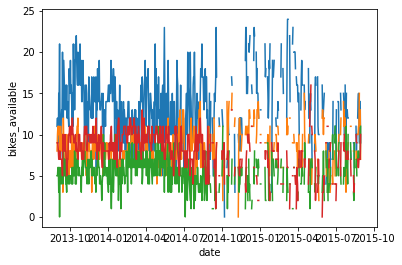

In [23]:
for i, st_id in enumerate(status_df.station_id.unique()):
    y = zeto_bike_df.loc[zeto_bike_df.station_id == st_id, 'bikes_available']
    x = zeto_bike_df.loc[zeto_bike_df.station_id == st_id, 'date']
    sns.lineplot(y = y, x  = x)
    if i == 3:
        break

In [30]:
zeto_bike_df[zeto_bike_df.station_id == 1].head(30)

,station_id,date,bikes_available
730,1,2013-09-01,8.0
731,1,2013-09-02,10.0
732,1,2013-09-03,11.0
733,1,2013-09-04,11.0
734,1,2013-09-05,10.0
735,1,2013-09-06,11.0
736,1,2013-09-07,8.0
737,1,2013-09-08,9.0
738,1,2013-09-09,10.0
739,1,2013-09-10,11.0
